<a href="https://colab.research.google.com/github/jessicasilvacodes/machinelearning-pucminas/blob/main/transforma%C3%A7%C3%A3o_dados_pucminas_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformação de dados

Este notebook foi desenvolvido para projetos e exercícios da disciplina de Machine Learning do curso de CIÊNCIA DE DADOS APLICADA À SAÚDE da PUC Minas.

Autora: Jessica Santos da Silva

Professor: Hugo de Paula



### Bibliotecas:



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

### Parâmetros de configuração:

In [50]:
np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option("display.precision", 2)

# Base de dados: **Titanic**

Essa base de dados pode ser obtida no Kaggle, no endereço:
[www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)




### Descrição do dataset:


*   ```survival``` --  Sobrevivente (0 = Não; 1 = Sim)
*   ```pclass``` --  Classe do passageiro (1 = 1a classe; 2 = 2a classe; 3 = 3a classe)
*   ```name``` --  Nome (str)
*   ```sex``` --  Sexo (male; female)
*   ```age``` --  Idade (numérica)
*   ```sibsp``` --  Número de irmãos/conjuges à bordo
*   ```parch``` --  Número de pais/filhos à bordo
*   ```ticket``` --  Número da passagem
*   ```fare``` --  Tarifa do passageiro
*   ```cabin``` --  Cabine
*   ```embarked``` --  Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

### Fazendo upload dos dados:

Usando a base de dados para treinamentos = *train*

In [51]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train (3).csv


### Visualizando os dados:

In [52]:
titanic_train = pd.read_csv(next(iter(uploaded.keys())))

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))
print("\nCampos de Titanic:\n{0}\n".format(list(titanic_train.keys())))
print("\nTipos dos dados:\n{0}\n".format(titanic_train.dtypes))


Dimensões de Titanic:
(891, 12)


Campos de Titanic:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Tipos dos dados:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



In [53]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [54]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


Para se ter uma visão dos atributos categóricos, os atributos não numéricos são descartados.

In [55]:
categ = titanic_train.dtypes[titanic_train.dtypes == "object"].index

print("\n", titanic_train[categ].describe(), sep='\n')



                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


### Remoção de atributos irrelevantes:

Os atributos ```survival``` (objetivo ou label), e atributos que descrevem os passageiros ou os agrupam em categorias são úteis e serão mantidos, por exemplo: ```Pclass```, ```Sex```, ```Age```, ```SibSp```, ```Parch```, ```Fare``` e ```Embarked```.


* ```passengerId``` é apenas uma chave primária para identificar um passageiro e não é relevante para o problema.

* ```Name``` náo é útil para previsão, mas pode ser útil para identificação dos registros ou pós-processamento (por exemplo, extrair o último nome).

* ```Ticket``` não identifica o registro e nem descreve o passageiro, por isso, deve ser removido.

* ```Cabin``` não identifica bem os passageiros, mas pode ser útil utilizarmos o padrão letra+numero para descrever os passageiros pelo andar do local da cabine.

In [56]:
del titanic_train["PassengerId"]
del titanic_train["Ticket"]

print("\nDimensões de Titanic:\n{0}\n".format(titanic_train.shape))


Dimensões de Titanic:
(891, 10)



Verifique que o número de atributos reduziu para 10.

### Transformação de variáveis:

Convertendo numérico em categórico:

Variáveis categóricas codificadas numericamente possuem baixa legibilidade. Portanto, podem ser candidatas a serem recodificadas.

In [57]:
new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Morreu","Sobreviveu"])
titanic_train["Survided"] = new_survived

new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)
new_Pclass = new_Pclass.rename_categories(["1aClasse","2aClasse","3aClasse"])
titanic_train["Pclass"] = new_Pclass

print("\nTipos dos dados:\n{0}\n".format(titanic_train.dtypes))
categ = titanic_train.dtypes[titanic_train.dtypes == "category"].index

print("\n", titanic_train[categ].describe(), sep='\n')


Tipos dos dados:
Survived       int64
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
Survided    category
dtype: object



          Pclass Survided
count        891      891
unique         3        2
top     3aClasse   Morreu
freq         491      549


#### Converter atributo através de processamento de string (usando *list comprehension*):

No atributo ```Cabin```,  parece que o padrão letra+número (veja exibição a seguir) indica que uma cabine pertence a algum andar, ou nível. Podemos agrupar o atributo Cabin pela letra inicial da cabine.


In [58]:
print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')


Valores únicos do atributo Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


Convertir esse dado para String:

In [59]:
char_cabin = titanic_train["Cabin"].astype(str)

Pega apenas a primeira letra:

In [60]:
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train["Cabin"] = new_cabin

print("\nValores únicos do atributo Cabin:",titanic_train["Cabin"].unique(), sep='\n')


Valores únicos do atributo Cabin:
['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
Categories (9, object): ['A', 'B', 'C', 'D', ..., 'F', 'G', 'T', 'n']


### Valores omissos ou inconsistentes:

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

Vamos analisar o atributo ```Age``` para tratarmos os valores omissos.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

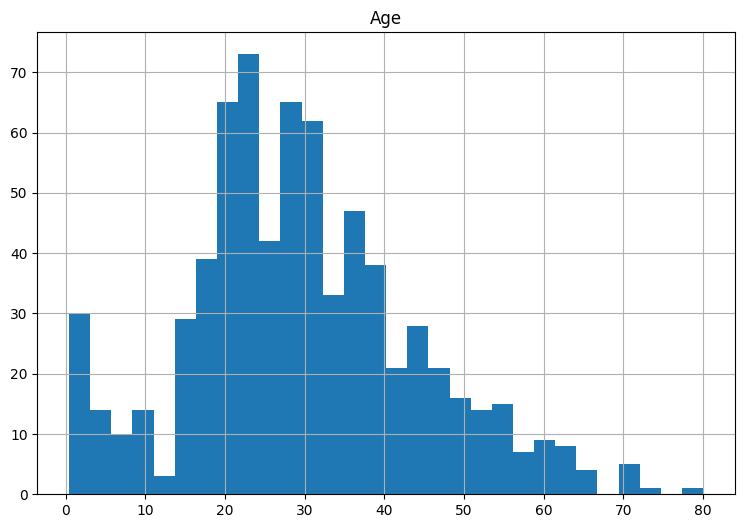

In [62]:
titanic_train.hist(column='Age',
                   figsize=(9,6),
                   bins=30)

O dado possui uma distribuição próxima da distribuição Normal. Vamos usar a mediana para preencher os valores faltantes.

In [67]:
mediana = np.median([el for el in titanic_train["Age"] if (np.isnan(el) == False)])

new_age = np.where(titanic_train["Age"].isnull(),
                   mediana,
                   titanic_train["Age"])
titanic_train["Age"] = new_age

print("\nAnálise do novo atributo Age:")
print(titanic_train["Age"].describe())


Análise do novo atributo Age:
count    891.00
mean      29.36
std       13.02
min        0.42
25%       22.00
50%       28.00
75%       35.00
max       80.00
Name: Age, dtype: float64


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

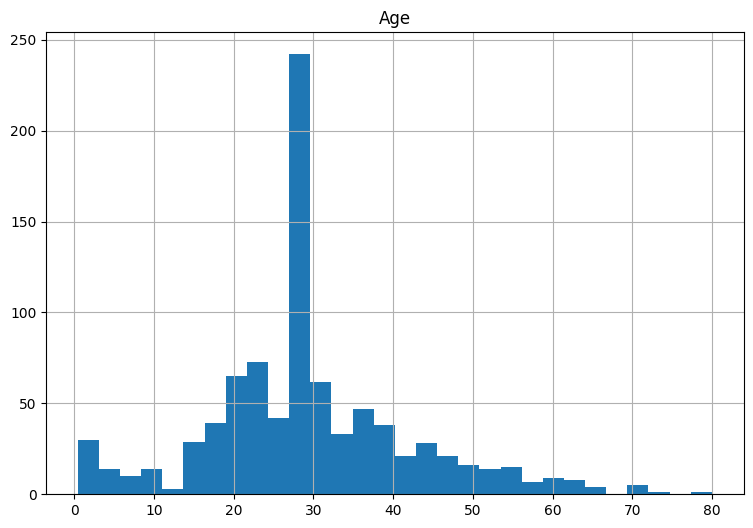

In [68]:
titanic_train.hist(column='Age',
                   figsize=(9,6),
                   bins=30)

### Detecção de Outliers

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

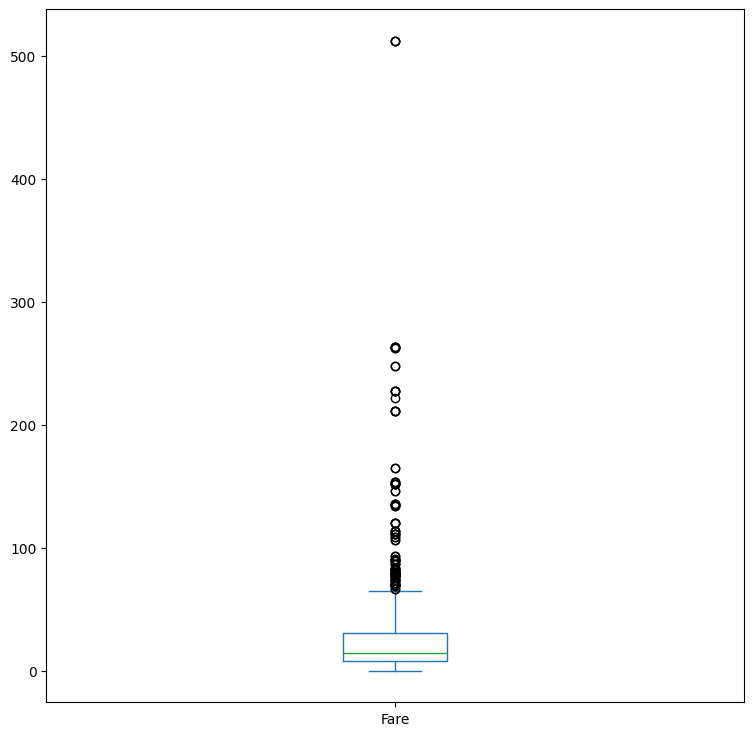

In [70]:
titanic_train["Fare"].plot(kind="box", figsize=(9,9))

index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]) )

In [71]:
print("Registros com valores extremos:",titanic_train.loc[index], sep='\n')

Registros com valores extremos:
     Survived    Pclass                                Name     Sex   Age  \
258         1  1aClasse                    Ward, Miss. Anna  female  35.0   
679         1  1aClasse  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737         1  1aClasse              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Fare Cabin Embarked    Survided  
258      0      0  512.33     n        C  Sobreviveu  
679      0      1  512.33     B        C  Sobreviveu  
737      0      0  512.33     B        C  Sobreviveu  


### Criando novos atributos:
Vamos criar uma nova variável ```Family```, que irá unir, conjude e irmãos (```SibSp```) com pais e filhos (```Parch```).

In [72]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

Encontrando quem tem a maior família à bordo:

In [73]:
most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

print("\nAs maiores famílias à bordo:\n{0}".format(titanic_train.loc[most_family]))


As maiores famílias à bordo:
     Survived    Pclass                               Name     Sex   Age  \
159         0  3aClasse         Sage, Master. Thomas Henry    male  28.0   
180         0  3aClasse       Sage, Miss. Constance Gladys  female  28.0   
201         0  3aClasse                Sage, Mr. Frederick    male  28.0   
324         0  3aClasse           Sage, Mr. George John Jr    male  28.0   
792         0  3aClasse            Sage, Miss. Stella Anna  female  28.0   
846         0  3aClasse           Sage, Mr. Douglas Bullen    male  28.0   
863         0  3aClasse  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked Survided  Family  
159      8      2  69.55     n        S   Morreu      10  
180      8      2  69.55     n        S   Morreu      10  
201      8      2  69.55     n        S   Morreu      10  
324      8      2  69.55     n        S   Morreu      10  
792      8      2  69.55     n        S   Morreu      10  
846    

 Os atributos agora estão redundantes, ou muito correlacionados, como podemos ver com a matriz de correlação. A matriz só funciona com tipos de ddos numéricos. Será possível perceber que a variável ```Family``` terá forte correlação (acima de 0.75) com ```SibSp``` e ```Parch```.

In [74]:
int_fields = titanic_train.dtypes[titanic_train.dtypes == "int64"].index
corr = np.corrcoef(titanic_train[int_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=int_fields, columns=int_fields)

print("\nMatriz de correlação dos atributos inteiros:\n{0}".format(correlacao))


Matriz de correlação dos atributos inteiros:
          Survived  SibSp  Parch  Family
Survived      1.00  -0.04   0.08    0.02
SibSp        -0.04   1.00   0.41    0.89
Parch         0.08   0.41   1.00    0.78
Family        0.02   0.89   0.78    1.00


# Base de dados do **Gazola de imóveis em São Paulo**

A base possui 14 campos: um identificador, 11 atributos e 2 rótulos (Cub e Preço $).



### Upload de arquivo local:

Upload do arquivo "Gazola_dados_apartamento_resumo.xls" disponível na pasta do drive, disponível [aqui](https://drive.google.com/drive/folders/16PaD-cekd8EEDMuQWBbIMjO-xJkVzQ7K?usp=sharing)

In [78]:
from google.colab import files

uploaded = files.upload()

Saving Gazola_dados_apartamento_resumo.xls to Gazola_dados_apartamento_resumo (1).xls


In [79]:
gazola = pd.read_excel(next(iter(uploaded.keys())), sheet_name=1)

In [81]:
print("\nDimensões:\n{0}\n".format(gazola.shape))


Dimensões:
(397, 14)



In [82]:
print("\nCampos:\n{0}\n".format(list(gazola.keys())))


Campos:
['imóvel', 'DepEmp', 'Conserv', 'Classif', 'Elev', 'RegHom', 'Suíte', 'Garag', 'Dorm', 'Idade', 'Energia', 'Artot', 'Cub', 'Preço($)']



In [83]:
print("\nTipos dos dados:\n{0}\n".format(gazola.dtypes))


Tipos dos dados:
imóvel        int64
DepEmp        int64
Conserv       int64
Classif       int64
Elev          int64
RegHom        int64
Suíte         int64
Garag         int64
Dorm          int64
Idade         int64
Energia       int64
Artot       float64
Cub         float64
Preço($)    float64
dtype: object



In [88]:
gazola.head()

,imóvel,DepEmp,Conserv,Classif,Elev,RegHom,Suíte,Garag,Dorm,Idade,Energia,Artot,Cub,Preço($)
0,1,1,3,2,2,6,1,2,2,4,147,103.69,1.09,23000.00
1,2,1,3,2,2,6,1,2,3,4,147,131.52,1.01,28000.00
2,3,1,3,2,2,6,2,2,2,4,147,142.66,1.06,35000.00
3,4,1,3,2,2,6,2,3,2,6,190,200.44,1.14,50000.00
4,5,1,3,2,2,6,2,3,2,6,190,200.44,0.97,45019.22


In [87]:
print(gazola.describe(percentiles=[]))

       imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
max    397.00    2.00     4.00     3.00    2.00   11.00    3.00    3.00   

         Dorm   Idade  Energia   Artot     Cub   Preço($)  
count  397.00  397.00   397.00  397.00  397.00     397.00  
mean     2.16    7.82   164.60  150.39    1.19   44024.67  
std      0.51    5.86    29.02   84.75    0.36   37585.95  
min      1.00    2.00    86.00   25.93    0.55    4130.62  
50%      2.00    6.00   160.00  127.92    1.14   32094.04  
max      3.00   28.00   266.00  620.73    2.61  250000.00  


### Preparando a base de treinamento:

É necessário remover o identificador, retirar o Cub e definir o preço como atributo alvo.

```train_test_split``` irá separar a base em "base de treinamento" e "base de teste" a partir de uma amostragem aleatória.


In [90]:
X = gazola.iloc[:,1:(gazola.shape[1] - 2)]

y = gazola.iloc[:,(gazola.shape[1] - 1)]

Recuperando os nomes dos atributos:

In [91]:
atributos = list(gazola)[1:(gazola.shape[1] - 2)]
rotulo = list(gazola)[(gazola.shape[1] - 1)]

### Histograma dos atributos:

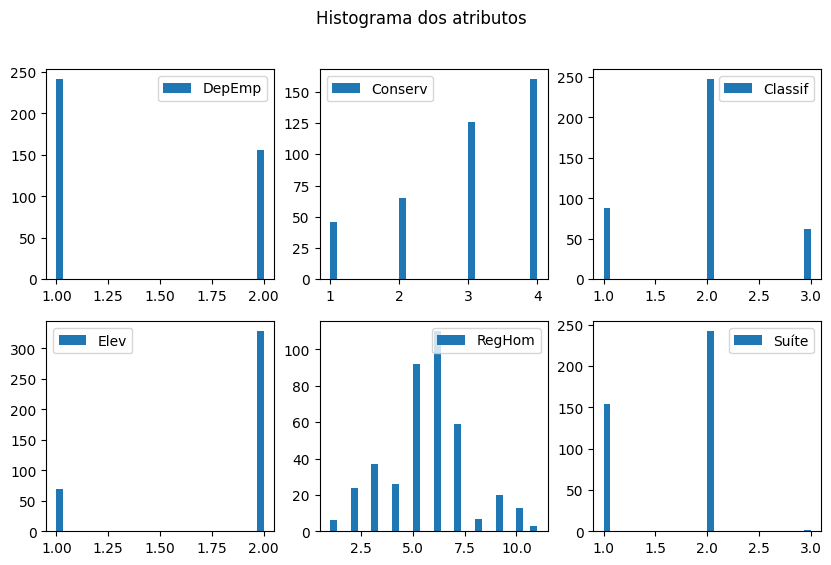

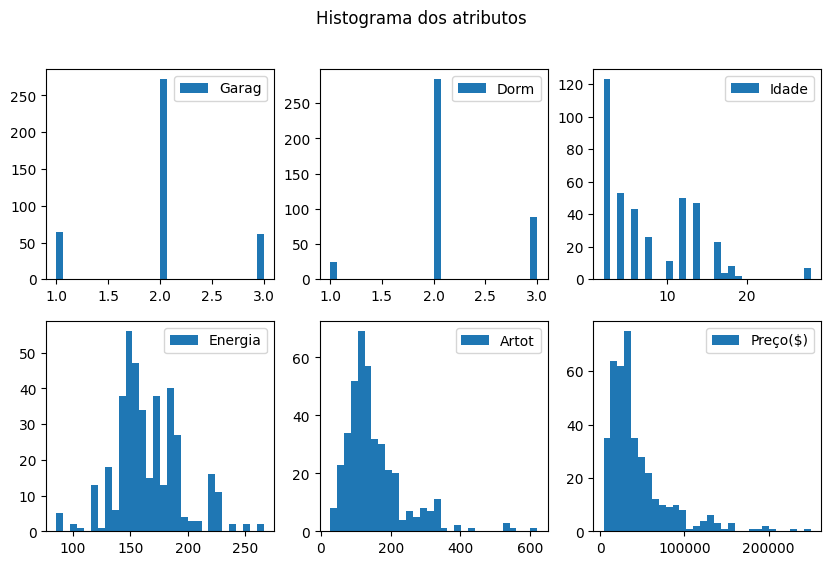

In [92]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        ax[i, j].hist(X.iloc[:,(i*3 + j)], label=atributos[i*3+j], bins=30)
        ax[i, j].legend()

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        if j == 2 and i == 1:
            ax[i, j].hist(y.iloc[:],label=rotulo,bins=30)
        else:
            ax[i, j].hist(X.iloc[:,(i*3 + j+6)],label=atributos[i*3 + j+6], bins=30)
        ax[i, j].legend()

Amostragem de dados:

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))

Base de treinamento:(357, 11)
Base de teste:(40, 11)


### Treinamento por regressão linear:

```fit()``` realiza o ajusto do modelo (treinamento).

```predict()``` aplica o modelo sobre novos dados.


In [94]:
lnr = LinearRegression().fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr.intercept_))
print("Número de atributos usados: {}".format(np.sum(lnr.coef_ != 0)))

Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.82
Descrição do modelo: 
w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57']  b: -15469.97
Número de atributos usados: 11


Calculando o erro absoluto e o erro percentual da regressao linear:

Erro percentual:
 Média: 0.25  Max: 0.87   Min: 0.00


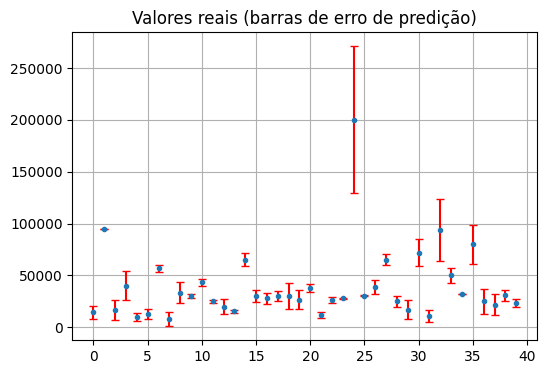

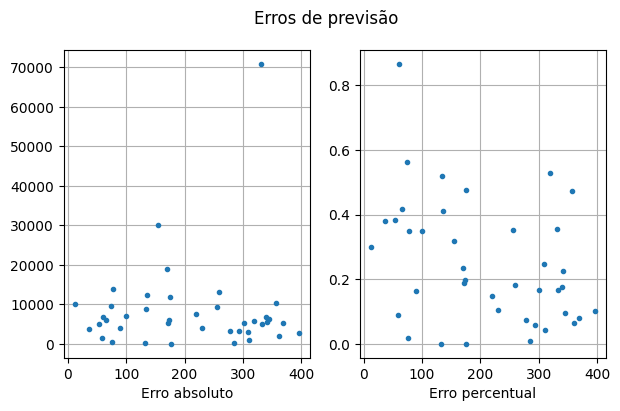

In [95]:
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print('Erro percentual:\n Média: {0:.2f}  Max: {1:.2f}   Min: {2:.2f}'
      .format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
             fmt='.', ecolor='r', capsize=3)
plt.title("Valores reais (barras de erro de predição)")
plt.grid()

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr,'.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(erroperc,'.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()

### Transformação de dados numéricos:

Para resolver problemas de distribuição e a normalização de dados.

Os atributos possuem faixas de valores diferentes, que influencia os pesos dos coeficientes da regressão.

Iremos aplicar o logaritmo em "Energia total", "Área total" e "Preço $".

In [96]:
X_scale = X

X_scale['Energia'] = np.log10(X['Energia'])
X_scale['Artot'] = np.log10(X['Artot'])
y_scale = np.log10(y)

Normalização Min-Max dos dados:

Text(0.5, 1.0, 'log_10(Preço $)')

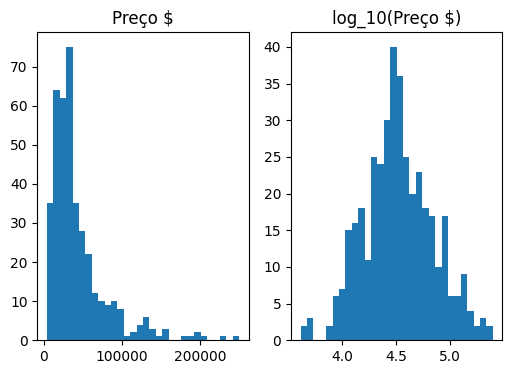

In [97]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X_scale)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].hist(y,bins=30, label='Preço $')
ax[0].set_title('Preço $')
ax[1].hist(y_scale,bins=30, label='log10(Preço $)')
ax[1].set_title('log_10(Preço $)')

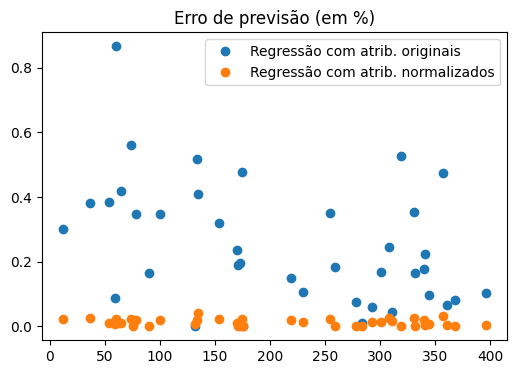

In [98]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)

lnr2 = LinearRegression().fit(X_train2, y_train2)

y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_prev2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2

plt.figure(figsize=(6, 4))
plt.plot(erroperc,'o', label='Regressão com atrib. originais')
plt.plot(errolnr2perc,'o', label='Regressão com atrib. normalizados')
plt.title("Erro de previsão (em %)")
plt.legend()

In [100]:
print("\n--------------- Regressão Linear Normalizada ---------------")
print("Acurácia da base de treinamento: {:.2f}".format(lnr2.score(X_train2, y_train2)))
print("Acurácia da base de testes: {:.2f}".format(lnr2.score(X_test2, y_test2)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr2.intercept_))


print("\n------------------  Comparação de pesos   ------------------")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("Original:\n w: {}  b: {:.2f}".format(s, lnr.intercept_))
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("Normalizado:\n w: {}  b: {:.2f}".format(s, lnr2.intercept_))


--------------- Regressão Linear Normalizada ---------------
Acurácia da base de treinamento: 0.96
Acurácia da base de testes: 0.93
Descrição do modelo: 
w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41']  b: 3.57

------------------  Comparação de pesos   ------------------
Original:
 w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57']  b: -15469.97
Normalizado:
 w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41']  b: 3.57
